In [1]:
! ls data/


BX-Police.csv     Sales.csv         budget-sample.csv
Iris.csv          Stocks.csv



# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/budget-sample.csv")

In [15]:
df.head

<bound method NDFrame.head of        fiscal_year  payroll_number                     agency_name  last_name  \
0             2020             826  DEPT OF ENVIRONMENT PROTECTION      BROWN   
1             2020              56               POLICE DEPARTMENT       WONG   
2             2020             742          DEPT OF ED PEDAGOGICAL    FARRELL   
3             2020             827        DEPARTMENT OF SANITATION  ATTANASIO   
4             2020             744   DEPT OF ED PARA PROFESSIONALS     MCNEIL   
...            ...             ...                             ...        ...   
16655         2020             744   DEPT OF ED PARA PROFESSIONALS    PLAGMAN   
16656         2020             742          DEPT OF ED PEDAGOGICAL    EDWARDS   
16657         2020             841    DEPARTMENT OF TRANSPORTATION       BUSH   
16658         2020              56               POLICE DEPARTMENT   CARRASCO   
16659         2020             742          DEPT OF ED PEDAGOGICAL    ANDRADE  

In [18]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

fiscal_year                   0
payroll_number                0
agency_name                   0
last_name                     0
first_name                    0
mid_init                      0
agency_start_date             0
work_location_borough         0
title_description             0
leave_status_as_of_june_30    0
base_salary                   0
pay_basis                     0
regular_hours                 0
regular_gross_paid            0
ot_hours                      0
total_ot_paid                 0
total_other_pay               0
dtype: int64

<AxesSubplot:xlabel='base_salary', ylabel='Count'>

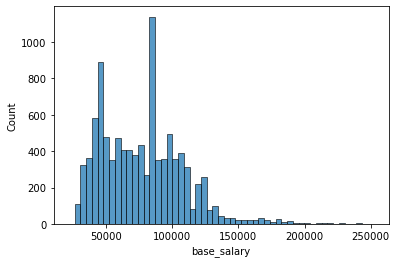

In [25]:
sns.histplot(data = df, x='base_salary')
#most people get paid at a base salary of about 45k and 70k

<AxesSubplot:xlabel='base_salary'>

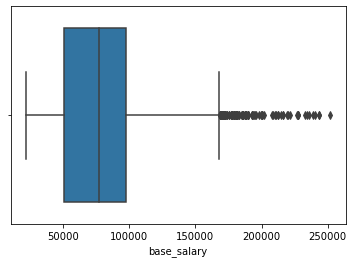

In [26]:
sns.boxplot(data=df, x='base_salary')
#most people have a base salary between 50k-100k with a few outliers.

<AxesSubplot:xlabel='work_location_borough', ylabel='base_salary'>

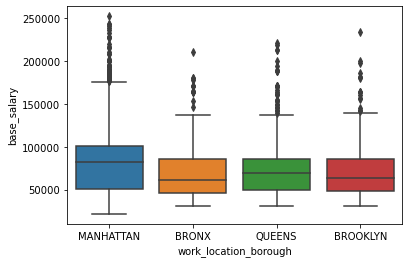

In [55]:
# Make a boxplot of base salaries per (or by) work_location_borough, 
# what does this tell you about the difference in working in each location?

sns.boxplot(x='work_location_borough', y='base_salary', data=df)
#They are all similar except Manahateen, which has a wider range of base_salary and the highest pay

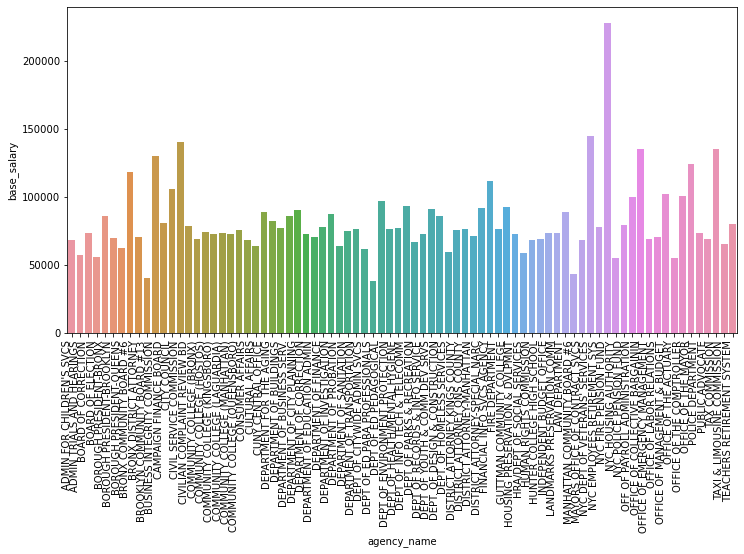

In [89]:
#Make a plot visualizing the difference average base salaries based on agency_name.  
#Who would you want to work for based on this information?

df_groupbyAgency = df.groupby('agency_name')
df_avg = df_groupbyAgency['base_salary'].mean()

df_avg = pd.DataFrame(df_avg)
df_avg = df_avg.reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_avg, x='agency_name', y='base_salary', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
#I would work for NYC Housing Authority

# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [125]:
df = pd.read_csv('data/BX-Police.csv')
df.head()
df.isnull().sum()
df.dropna()
df.drop_duplicates()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,2016,NaN,POLICE DEPARTMENT,BUICE,WALKEENA,NaN,03/01/2016,BRONX,SCHOOL SAFETY AGENT,ACTIVE,30714.0,per Annum,652.25,8638.87,0.00,0.00,0.00
2570,2021,56.0,POLICE DEPARTMENT,GIRAUD,PIERRE,H,07/11/2012,BRONX,POLICE OFFICER,ACTIVE,85292.0,per Annum,2080.00,85051.84,40.67,1493.25,19652.92
2571,2020,56.0,POLICE DEPARTMENT,JUBRAN,KARAM,E,07/01/2002,BRONX,POLICE OFFICER,ACTIVE,85292.0,per Annum,2080.00,84831.14,335.08,19363.61,17844.64
2572,2018,56.0,POLICE DEPARTMENT,GRAVIUS,CHRISTOPHER,J,01/10/2007,BRONX,POLICE OFFICER,ACTIVE,85292.0,per Annum,2045.72,85058.22,26.92,1800.64,12515.78


<AxesSubplot:xlabel='fiscal_year', ylabel='base_salary'>

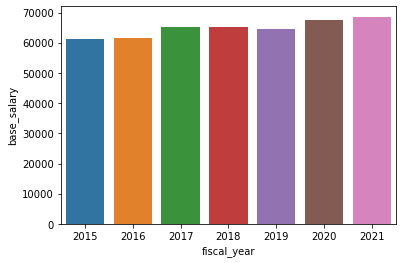

In [126]:
df_groupby = df.groupby('fiscal_year')
df_avg = df_groupby['base_salary'].mean()
df_avg = pd.DataFrame(df_avg)
df_avg = df_avg.reset_index()
df_avg
sns.barplot(data=df_avg, x='fiscal_year', y='base_salary')
#this trend shows that "Defund the Police" is a lie and that Police Unions are criminally powerful
#Because every year we pay them more. And politicians love their tried and true "Crime on the rise" talking points

# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [128]:
df = pd.read_csv('data/Stocks.csv')
df.head()
df.dropna()
df.drop_duplicates()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG
...,...,...,...,...,...,...,...,...
247,2021-12-27,662800,2968.530029,2945.000000,2949.270020,2961.280029,2961.280029,GOOG
248,2021-12-28,931200,2967.489990,2918.709961,2967.489990,2928.959961,2928.959961,GOOG
249,2021-12-29,851100,2943.675049,2910.090088,2928.590088,2930.090088,2930.090088,GOOG
250,2021-12-30,648900,2941.250000,2915.169922,2929.000000,2920.050049,2920.050049,GOOG


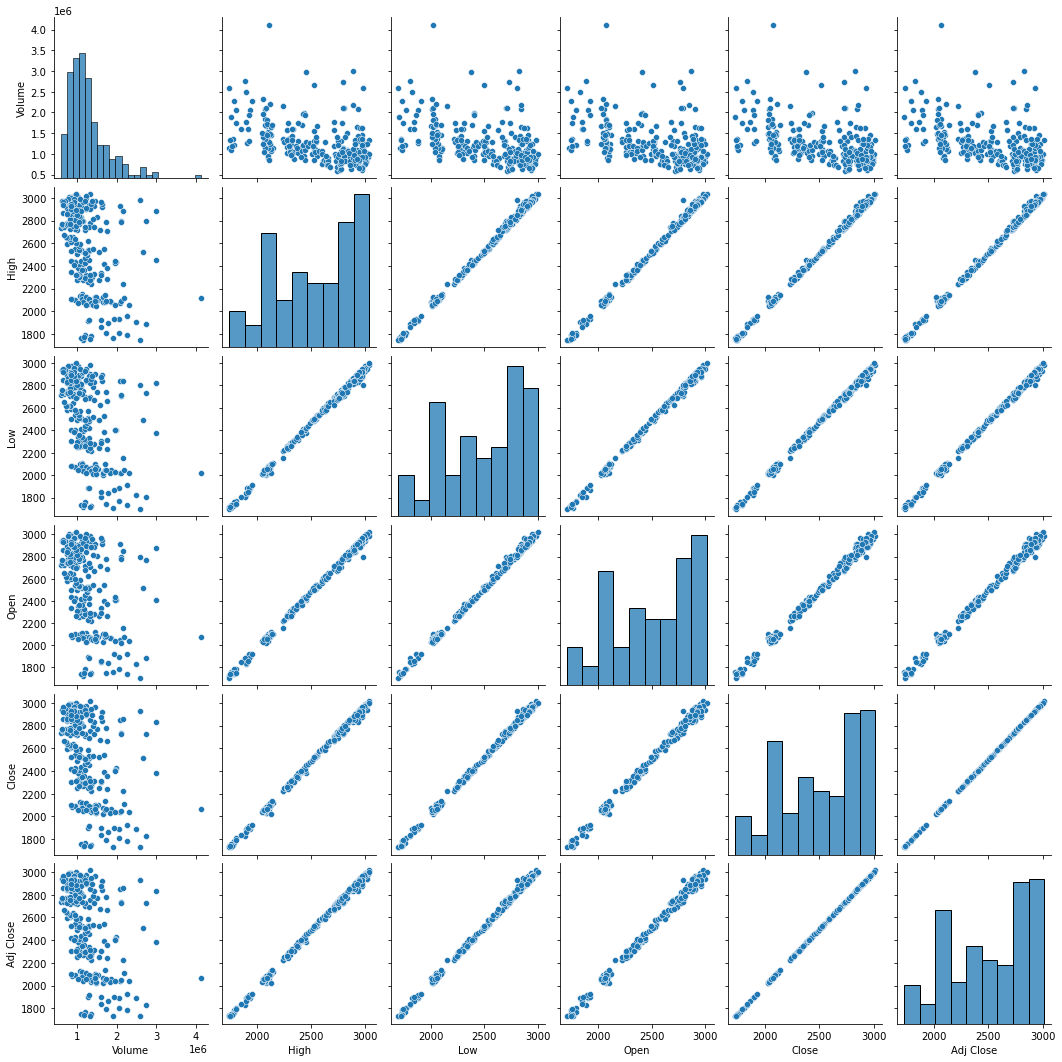

In [111]:
sns.pairplot(data=df)
#the story is taht I have no idea how to read these graphs. I can see that, besides volume, everything seems to be 
#linearly related. Volume seems to have an inverse relationship. The graphs also look very similar to each other

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [131]:
df = pd.read_csv('data/Sales.csv')
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740


<AxesSubplot:>

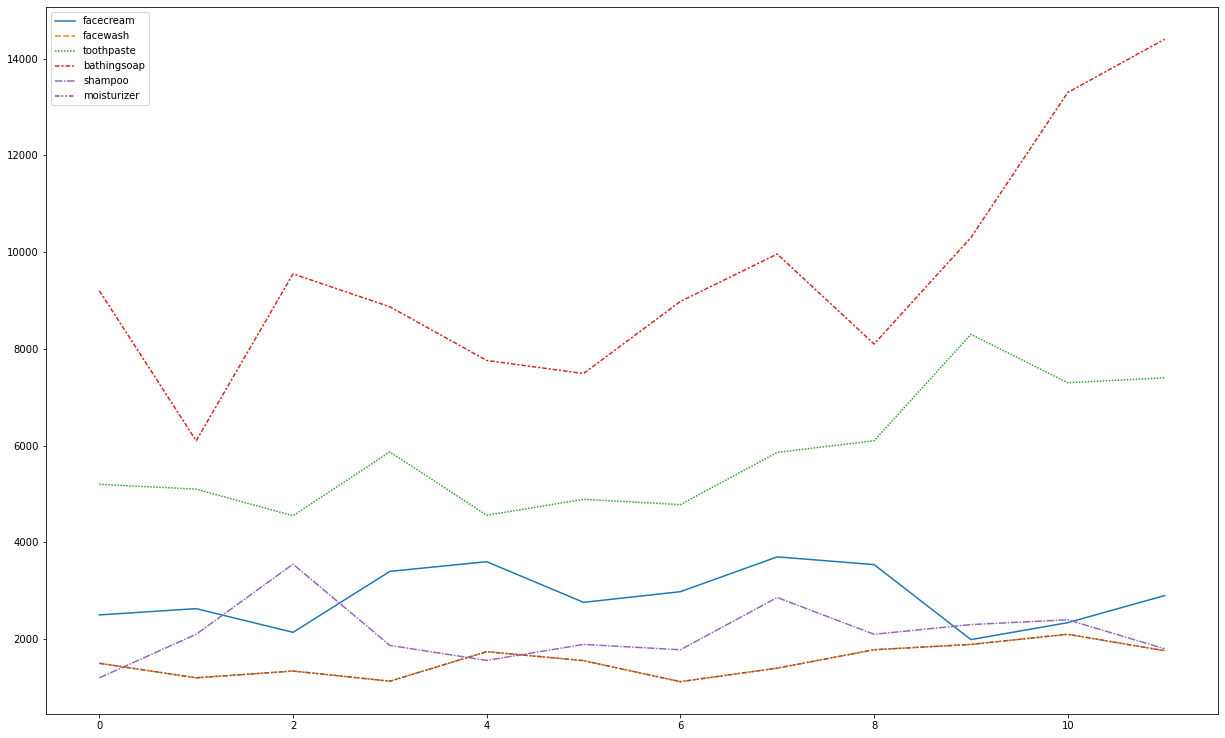

In [186]:
items = list(df.columns)
items.pop(0)

fig, ax = plt.subplots(figsize=(21, 13))
sns.lineplot(data=df[items])
#Some items are sold at a constant rate, while other items fluctuate.
#bathingsoap is selling the best while the worst is moisturizer\

In [211]:
total = df.sum().sum()
for item in items:
    print(f"{item} percentage:\t {round(((df[item].sum() / total) * 100), 2)}%")

facecream percentage:	 12.27%
facewash percentage:	 6.59%
toothpaste percentage:	 24.89%
bathingsoap percentage:	 40.58%
shampoo percentage:	 9.05%
moisturizer percentage:	 6.59%
